<a href="https://colab.research.google.com/github/Idzhar16/Capstone/blob/main/fixxxxxxxxxxxxxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/Dataset_Capstone/datasetfix.zip" -d "/content"

Archive:  /content/drive/MyDrive/Dataset_Capstone/datasetfix.zip
   creating: /content/datasetfix/
  inflating: /content/datasetfix/ades.jpg  
  inflating: /content/datasetfix/ades1.jpg  
  inflating: /content/datasetfix/ades10.jpg  
  inflating: /content/datasetfix/ades2.jpg  
  inflating: /content/datasetfix/ades3.jpg  
  inflating: /content/datasetfix/ades4.jpeg  
  inflating: /content/datasetfix/ades5.jpeg  
  inflating: /content/datasetfix/ades6.jpg  
  inflating: /content/datasetfix/ades7.jpg  
  inflating: /content/datasetfix/ades9.jpg  
  inflating: /content/datasetfix/aqua1.jpeg  
  inflating: /content/datasetfix/aqua1.jpg  
  inflating: /content/datasetfix/aqua10.jpg  
  inflating: /content/datasetfix/aqua2.jpeg  
  inflating: /content/datasetfix/aqua2.jpg  
  inflating: /content/datasetfix/aqua3.jpg  
  inflating: /content/datasetfix/aqua4.jpeg  
  inflating: /content/datasetfix/aqua5.jpeg  
  inflating: /content/datasetfix/aqua6.jpeg  
  inflating: /content/datasetfix/aqua7

# Split Train and Validation

In [3]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [4]:
# Specify the paths to original dataset and the destination directory
original_dataset_path = 'datasetfix/'
destination_path = '/content/dataset'

# Get a list of all subdirectories in the original dataset path
class_directories = os.listdir(original_dataset_path)
train_split_ratio = 0.8
print(class_directories)

['golda10.jpg', 'mizone4.jpg', 'ichitan thai tea4.jpg', 'ichitan thai tea9.jpeg', 'teh pucuk4.jpeg', 'ades4.jpeg', 'sprite10.jpg', 'golda8.jpg', 'coca cola2.jpeg', 'ichitan thai tea3.jpeg', 'sprite9.jpg', 'vit9.jpg', 'frestea6.jpg', 'nutri boost8.jpg', 'sprite8.jpg', 'ades.jpg', 'frestea7.jpg', 'le minerale9.jpeg', 'teh botol5.jpeg', 'pulpy5.jpg', 'nutri boost7.jpg', 'coca cola10.jpg', 'nutri boost9.jpg', 'teh pucuk8.jpeg', 'teh pucuk2.jpeg', 'sprite7.jpg', 'fanta5.jpg', 'vit2.jpeg', 'fruit tea10.jpeg', 'ichitan thai tea8.jpg', 'ades7.jpg', 'ichitan thai tea5.jpg', 'nutri boost2.jpg', 'ades10.jpg', 'ades6.jpg', 'ades1.jpg', 'sprite3.jpg', 'golda4.jpg', 'sprite2.jpg', 'good day7.jpg', 'pulpy4.jpg', 'vit1.jpeg', 'le minerale4.jpg', 'pocari5.jpg', 'tebs7.jpeg', 'golda1.jpeg', 'vit4.jpeg', 'pocari6.jpeg', 'tebs1.jpeg', 'pulpy1.jpeg', 'mizone7.jpeg', 'aqua5.jpeg', 'vit10.jpg', 'golda9.jpg', 'nutri boost4.jpeg', 'tebs8.jpg', 'pocari7.jpg', 'golda3.jpg', 'teh botol8.jpg', 'fruit tea8.jpeg', '

In [5]:
class_dict = {}
for i, class_directory in enumerate(class_directories):
    class_path = os.path.join(original_dataset_path, class_directory)

    # Check if the item in the directory is a directory itself
    if os.path.isdir(class_path):
        class_dict[i] = class_directory
        # Create a destination directory for the class in the new structure
        # Create a destination directory for the class in the new structure
        destination_train_class_path = os.path.join(destination_path, 'train', class_directory)
        os.makedirs(destination_train_class_path, exist_ok=True)

        destination_validation_class_path = os.path.join(destination_path, 'validation', class_directory)
        os.makedirs(destination_validation_class_path, exist_ok=True)

        # Get a list of all image files in the class directory
        image_files = os.listdir(class_path)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the split index based on the split ratio
        split_index = int(train_split_ratio * len(image_files))

        # Split the image files into train and validation sets
        train_files = image_files[:split_index]
        validation_files = image_files[split_index:]

        # Move each train image file to the corresponding class directory in the train split
        for train_file in train_files:
            image_path = os.path.join(class_path, train_file)
            destination_image_path = os.path.join(destination_train_class_path, train_file)
            shutil.copy2(image_path, destination_image_path)

        # Move each validation image file to the corresponding class directory in the validation split
        for validation_file in validation_files:
            image_path = os.path.join(class_path, validation_file)
            destination_image_path = os.path.join(destination_validation_class_path, validation_file)
            shutil.copy2(image_path, destination_image_path)

print('Dataset reorganized and split successfully!')

Dataset reorganized and split successfully!


# Preprocess

In [6]:
PATH = os.path.join("/content/drive/MyDrive/Dataset_Capstone/dataset")
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 200 files belonging to 20 classes.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 60 files belonging to 14 classes.


In [8]:
class_names = train_dataset.class_names
print(class_names)

['ades', 'aqua', 'coca cola', 'fanta', 'frestea', 'fruit tea', 'golda', 'good day', 'ichitan thai tea', 'le minerale', 'mizone', 'nutri boost', 'pocari', 'pulpy', 's tee', 'sprite', 'tebs', 'teh botol', 'teh pucuk', 'vit']


In [9]:
# Save Classname in txt file
with open('class_names.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

print(class_names)

['ades', 'aqua', 'coca cola', 'fanta', 'frestea', 'fruit tea', 'golda', 'good day', 'ichitan thai tea', 'le minerale', 'mizone', 'nutri boost', 'pocari', 'pulpy', 's tee', 'sprite', 'tebs', 'teh botol', 'teh pucuk', 'vit']


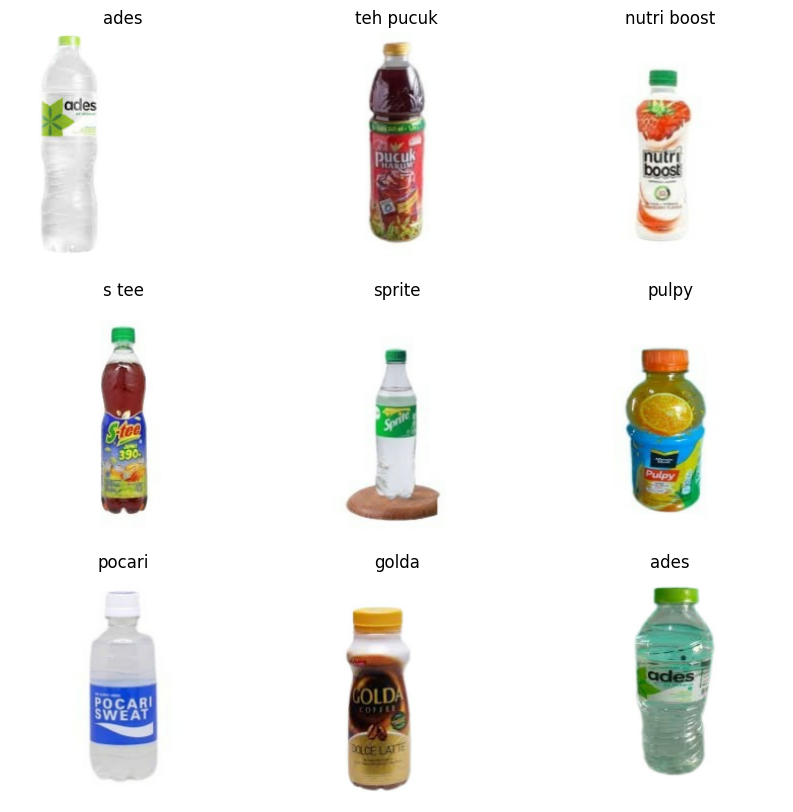

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [12]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 2
Number of test batches: 0


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomBrightness(0.2),
])

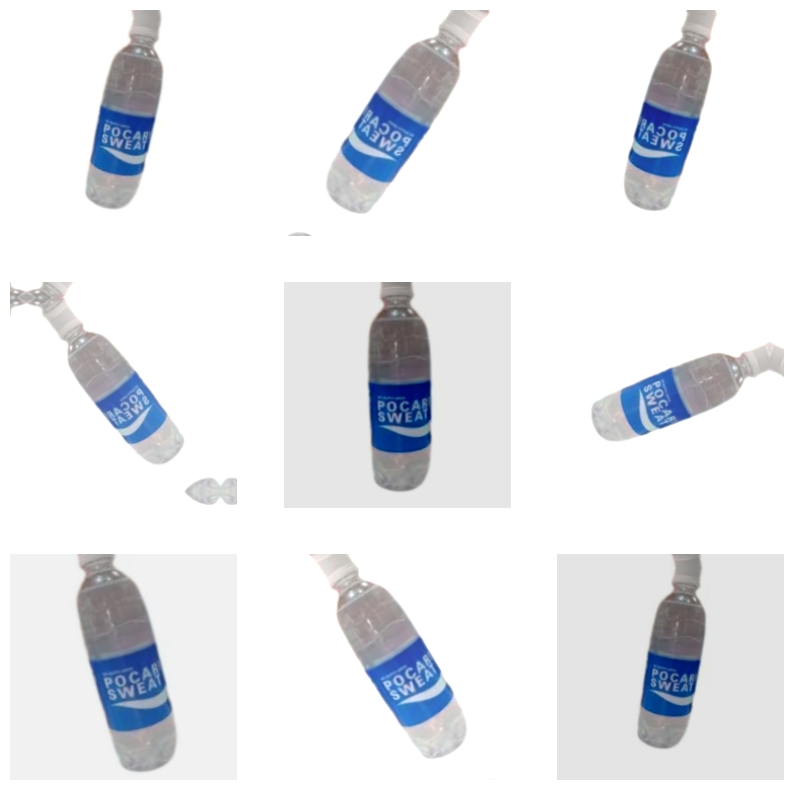

In [15]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [16]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./255, offset=-1)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Create and Training Model

In [18]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetV2M(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

214201816/214201816 [==============================] - 10s 0us/step


In [19]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [20]:
base_model.trainable = False

In [21]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [23]:
prediction_layer = tf.keras.layers.Dense(len(class_names))
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 20)


In [24]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [25]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                25620 

In [27]:
len(model.trainable_variables)

2

In [28]:
initial_epochs = 100
loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 34s 3s/step - loss: 3.0219 - accuracy: 0.0667


In [29]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.02
initial accuracy: 0.07


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor="val_loss",
                            factor=0.25,
                            patience=1,
                            verbose=1,
                            min_lr=1e-7
                        )

In [31]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,
                      epochs=initial_epochs,
                      validation_data=validation_dataset,
                      callbacks=[early_stopping, callback_reduce_lr])

Epoch 1/100
7/7 [==============================] - 26s 724ms/step - loss: 2.9901 - accuracy: 0.0600 - val_loss: 3.0472 - val_accuracy: 0.0833 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 3s 333ms/step - loss: 2.6313 - accuracy: 0.3000 - val_loss: 3.0017 - val_accuracy: 0.0167 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 2.3315 - accuracy: 0.5350
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
7/7 [==============================] - 2s 276ms/step - loss: 2.3315 - accuracy: 0.5350 - val_loss: 3.0520 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 2.1622 - accuracy: 0.6100
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
7/7 [==============================] - 2s 290ms/step - loss: 2.1622 - accuracy: 0.6100 - val_loss: 3.0650 - val_accuracy: 0.0000e+00 - lr: 2.5000e-04
Epoch 5/100
7/7 [==============================] - ETA: 0s

In [32]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 1s 183ms/step - loss: 3.0017 - accuracy: 0.0167
Test accuracy : 0.01666666753590107


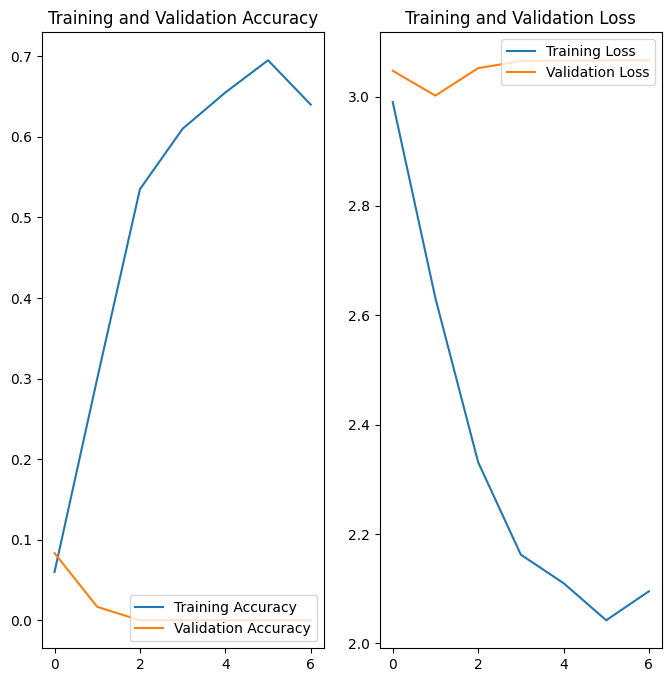

In [33]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
model.save("model.h5", include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
(tf. __version__)

'2.15.0'

In [36]:
model.save("/content/drive/MyDrive/Dataset_Capstone/saved_model/model_saved")

In [37]:
tf.saved_model.save(model,"saved_model/h5" )

In [38]:
!zip -r "/content/saved_model.zip" "/content/saved_model/h5"

  adding: content/saved_model/h5/ (stored 0%)
  adding: content/saved_model/h5/variables/ (stored 0%)
  adding: content/saved_model/h5/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/saved_model/h5/variables/variables.index (deflated 77%)
  adding: content/saved_model/h5/saved_model.pb (deflated 92%)
  adding: content/saved_model/h5/assets/ (stored 0%)
  adding: content/saved_model/h5/fingerprint.pb (stored 0%)


# Fine tune 1

In [39]:
base_model.trainable = True

In [40]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 300

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  740


In [41]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                25620 

In [42]:
len(model.trainable_variables)

387

In [43]:
fine_tune_epochs = 0
total_epochs =  initial_epochs + fine_tune_epochs
with tf.device('/GPU:0'):
  history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping,callback_reduce_lr])

Epoch 7/100
7/7 [==============================] - 65s 2s/step - loss: 10.1451 - accuracy: 0.1250 - val_loss: 3.1381 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 8/100
7/7 [==============================] - 5s 588ms/step - loss: 3.4902 - accuracy: 0.0550 - val_loss: 3.0166 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 9/100
7/7 [==============================] - 4s 582ms/step - loss: 2.9989 - accuracy: 0.0500 - val_loss: 3.0062 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 10/100
7/7 [==============================] - 5s 724ms/step - loss: 3.0009 - accuracy: 0.0500 - val_loss: 2.9991 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 11/100
7/7 [==============================] - 5s 584ms/step - loss: 3.0155 - accuracy: 0.0500 - val_loss: 2.9952 - val_accuracy: 0.0000e+00 - lr: 5.0000e-04
Epoch 12/100
7/7 [==============================] - 5s 590ms/step - loss: 2.9963 - accuracy: 0.0450 - val_loss: 2.9946 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 13/100
7/7 [============================

In [44]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

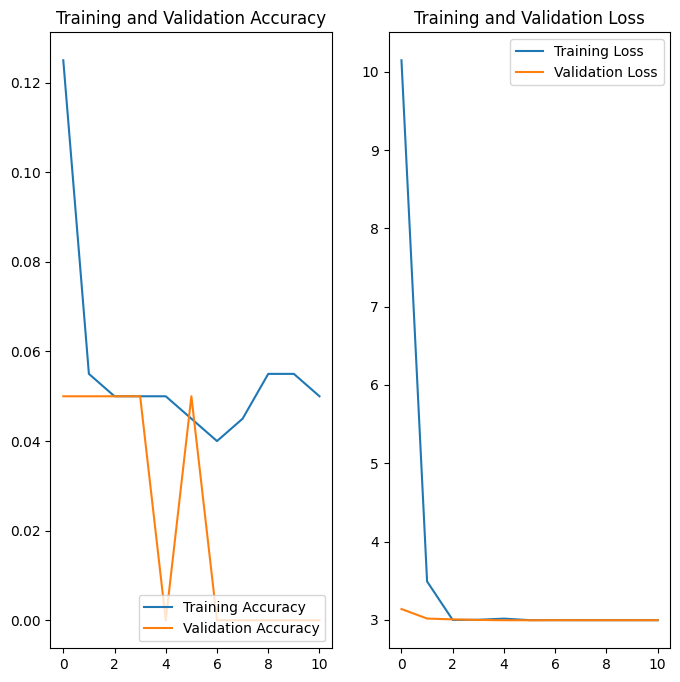

In [45]:
# Plot the training and validation accuracy and loss at each epoch
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']

val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
loss, accuracy = model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 1s 188ms/step - loss: 2.9946 - accuracy: 0.0500
Test accuracy : 0.05000000074505806


In [47]:
!mkdir -p saved_model
history_fine.model.save('saved_model/my_model')

In [48]:
history_fine.model.save('saved_model/my_model_h5/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# fine tune 2

In [49]:
base_model.trainable = True

In [50]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  740


In [51]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                25620 

In [52]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_1 = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[early_stopping])

Epoch 7/150
7/7 [==============================] - 93s 3s/step - loss: 2.9964 - accuracy: 0.0250 - val_loss: 2.9958 - val_accuracy: 0.0000e+00
Epoch 8/150
7/7 [==============================] - 6s 703ms/step - loss: 2.9959 - accuracy: 0.0500 - val_loss: 2.9960 - val_accuracy: 0.0000e+00
Epoch 9/150
7/7 [==============================] - 5s 698ms/step - loss: 2.9958 - accuracy: 0.0500 - val_loss: 2.9965 - val_accuracy: 0.0000e+00
Epoch 10/150
7/7 [==============================] - 7s 895ms/step - loss: 2.9959 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0000e+00
Epoch 11/150
7/7 [==============================] - 6s 771ms/step - loss: 2.9958 - accuracy: 0.0500 - val_loss: 2.9956 - val_accuracy: 0.0000e+00
Epoch 12/150
7/7 [==============================] - 6s 803ms/step - loss: 2.9958 - accuracy: 0.0500 - val_loss: 2.9955 - val_accuracy: 0.0000e+00
Epoch 13/150
7/7 [==============================] - 6s 753ms/step - loss: 2.9958 - accuracy: 0.0500 - val_loss: 2.9954 - val_accu